XOR - Introduction to Neural Networks
--------------------------------------------------
### The basics of neural networks
Traditionally, programs need to be hard coded with whatever you want it to do. If they are programmed using extensive techniques and painstakingly adjusted, they may be able to cover for a majority of situations, or at least enough to complete the necessary tasks. However, ***neural networks*** are a type of algorithm that's capable of learning. Well, kinda. Let me explain..

Neural networks are a type of program that are based on, very loosely, a human neuron. All you really need to know about a neuron, without turning this into a bio lesson, is that there is an input area, a processing area in that carries information connecting the output of one neuron to the input of another - known as synapses - and an output area. These branch off and connect with many other neurons, passing information from the brain and back. Millions of these neural connections exist throughout our bodies, collectively referred to as ***neural networks***.


![alt text](images/neuron.gif "Neuron - Via GIPHY")


Now that we've looked at real neural networks, we can start discussing ***artificial neural networks***. Like the biological kind, an artificial neural network has inputs, a processing area that transmits information, and outputs. However, these are much simpler, in both design and in function, and nowhere near as powerful as the real kind.


Here is a diagram of a basic artificial neuron:

![basic neuron](images/basicNN.png "Basic Neuron")

This is an example of a simple 3-input, 1-output neural network. As we talked about, each of the neurons has an input, $i_n$, a connection to the next neuron layer, called a ***synapse***, which carries a weight $w_n$, and an output layer. In this case, there is only one output.

We start with random synaptic weights, which almost always leads to incorrect outputs. These weights will need to be adjusted, a process I prefer to call "learning".

The basic idea is to take the input, multiply it by the synaptic weight, and check if the output is correct. If it is not, adjust the weight, multiply it by the input again, check the output and repeat, until we have reached an ideal synaptic weight.


### What is XOR?
-------------------------------
An XOR gate is a kind of logic gate. It takes in two inputs, both a $0$ or $1$ (i.e. it has so-called ***boolean*** inputs), and outputs a single $0$ or $1$ according to the following table:

|Input 1|Input 2||Output|
|:--------:|:--------:||:-----:|
| 0        | 0        || 0|
| 0        | 1        || 1 |
| 1        | 0        || 1 |
| 1        | 1        || 0 |

$0$ can be thought of as representing "OFF" or "FALSE", while $1$ is "ON" or "TRUE".


### Getting into the details
--------------------------------------
Let's look at it more closely.

Remember how I said the main idea is that you want to multiply the inputs by the right numbers to get the output?

We'll give our inputs, which is either 0 or 1, and they both will be multiplied by the synaptic weight. We'll adjust it until we get an accurate output each time, and we're confident the neural network has learned the pattern.

To write this out in mathematical terms, it is the sum of all the inputs multiplied by their synaptic weights. Here's the equation (where $o$ is the output):


$$o=(i_1 \cdot w_1) + (i_2 \cdot w_2) + (i_3 \cdot w_3) + \cdots $$



or equivalently:


$$o=\sum_n i_n \cdot w_n$$

Let's get back to our example. We already have our inputs and outputs, which we will train the neural network on, so let's plug it into our neural network. We'll use the diagram above. For the first data set, this is what it should look like:

<img src="/images/inputNN.png" alt="Network with inputs and output">

Now we just follow the equation. That is:

$$\sum_n i_n \cdot w_n = (0 \cdot w_1) + (0 \cdot w_2) = 0$$

Our neural network needs to find the correct synaptic weights which will allow it to make the right prediction. We'll train it in this same way with all of the data:

<p></p>

$$\sum_n i_n \cdot w_n = (0 \cdot w_1) + (1 \cdot w_2) = 1$$

$$\sum_n i_n \cdot w_n = (1 \cdot w_1) + (0 \cdot w_2) = 1$$

$$\sum_n i_n \cdot w_n = (1 \cdot w_1) + (1 \cdot w_2) = 0$$

Let's start laying out our steps thus far:

<pre style="font-family: times, serif; font-size:11pt; text-align: left; line-height: 1.5;">
                <strong>1:</strong> Obtain a dataset with <i>i<sub>x</sub></i> inputs and <i>o<sub>y</sub></i> outputs 
                          - the neural network will have this same number of inputs and outputs.
                <strong>2:</strong> Plug your input vectors into your neural network (in this example the inputs are [0, 0], [0, 1], [1, 0], [1, 1]).
                <strong>3:</strong> Train the network to find the correct synaptic weights.
</pre>

We'll keep adding to our list of steps as we go.

### Finding the synaptic weights and understanding the sigmoid
--------------------------------------
Now that we've got our data, we're ready to start training. But the question remains, how do we obtain the correct synaptic weights?

First, we'll have to assign random weights to each synapse, just as a starting point. We then multiply our inputs times these random starting weights. 

Next, we'll need to normalize it so that the output is between 0 and 1. For our case, this is because the output is either 0 or 1. 

But in other cases, the output could be a probability, a number greater than 1, or anything else. Normalizing in this way uses something called an ***activation function***, of which there are many. 

To normalize, we simply take our $\sum_n i_n \cdot w_n$ and plug it in for $x$ in our activation function.

As I said, there are many different kinds of activation functions - ```tanh```, ```relu```, ```binary step``` - all of which have their own respective uses and qualities. For this example, we'll be using what's called the **logistic sigmoid function***.

The sigmoid function is given by 

$$L(x)=\frac{1}{1 + e^{-x}}$$

Let's graph it and take a look at some of its qualities, and why it's useful for us.

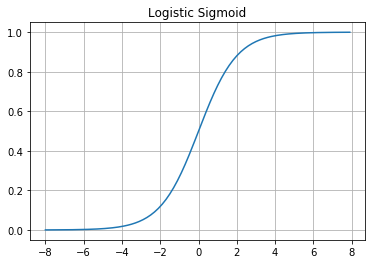

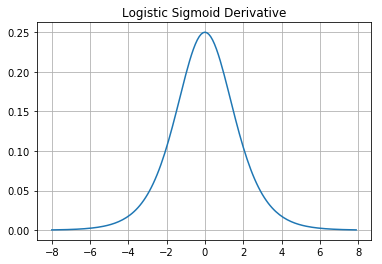

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import exp

#sigmoid function is 1/(1+e^(-x))
def logistic(x):
    #define an array a
    a = []
    for value in x:
        a.append(1/(1+exp(-value)))
    return a

#sigmoid derivative is x * (1 - x)
def derivative(z):
    b = []
    for value in z:
        b.append(exp(-value)/(1+exp(-value))**2)
    return b

x = np.arange(-8., 8., 0.1)
plt.plot(x, logistic(x))
plt.title("Logistic Sigmoid")
plt.grid(True)
plt.show()

z = np.arange(-8., 8., 0.1)
plt.plot(z, derivative(z))
plt.title("Logistic Sigmoid Derivative")
plt.grid(True)
plt.show()

The sigmoid has outputs in $(0,1)$. The further $x$ goes in the positive direction, the closer it gets to 1. The further $x$ goes in the negative direction, the closer it gets to 0. However, it doesn't ever touch 0 or 1, which is important to remember.

Like I said earlier, the random synaptic weight will most likely not give us the correct output the first try. So we need a way to adjust the synpatic weights until it starts producing accurate outputs and "learns" the trend.

Our starting inputs are $0,0$, and we to multiply them by weights that will give us our output, $0$. However, any number multiplied by 0 will give us 0, so let's move on to the second input $0,1 \mapsto 1$.

Using a random number generator, our starting weights are $.03$ and $0.2$.

Using the equation this gives us:

$$\sum_n i_n \cdot w_n = (0 \cdot 0.2) + (1 \cdot 0.03) = 0 + 0.03 = .03$$

Plug this into the sigmoid activation function:

$$\frac{1}{1 + e^{(-(.03))}} = .507$$

So we end up with an answer of .507, but our correct output is supposed to be 1. So how can the neural network learn from, and correct its errors?

We use the derivative of the logistic sigmoid function.

I graphed the logistic sigmoid derivative up above as well, and its equation is:

$$L'(x)=\frac{e^{-x}}{(1+e^{-x})^2}=L(x)\big(1 - L(x)\big).$$

If the predicted output is some $x_0,$ then the error is simply $\text{err}(x)=x_0 - L(x)$, which in our example is $1 - .507$.  To correct our errors, we'll be using an equation called the ***error weighted derivative***, which is defined as

\begin{align*}
\text{ewd}(x) &=\text{err}(x)\cdot x \cdot L(x)\cdot L'(x)
&
\end{align*}

which is:

\begin{align*}
\text{ewd}(x) = \text{error} \cdot \text{input} \cdot \big(\text{output}\cdot (1 - \text{output})\big) \\
\end{align*}

There are a few reasons to use the error-weighted derivative. 
- Firstly, we want to calculate how far off our prediction is from the real output. So we calculate the simple error, which is the difference between the two: (output - predicted output)
- Next, we want to multiply by the input. If the input is 1, it may need adjustment; if the input is 0, it doesn't need any adjustment, since 0 multiplied by anything is still 0.
- Lastly, we use the derivative by plugging in the output. Since the graph approaches 0 on the y-axis as it approaches 1, we know that the adjustment won't be large if the output is getting closer to 1. In other words, we want a proportional adjustment.

Let's go through one iteration of the equation so we can really see what's going on.

In our first attempt through randomly generated synaptic weights, we got $0.507$ as our predicted output. The expected output is $1$, so here $x_0=1.$ First let's calculate error, then we can do the derivative:

\begin{align*}
\text{err}(0.507) &= 1 - 0.507 = 0.493
\end{align*}

\begin{align*}
L'(0.507) &= 0.507 \cdot (1 - 0.507) = 0.249951
\end{align*}

Putting it all together, we get

$$\text{ewd}(0.507)=\text{err}(0.507) \cdot 1 \cdot L'(0.507) = 0.493 \cdot 1 \cdot 0.249951 = 0.1232.$$

This number at the end, $0.1232$, is the adjustment for the synaptic weights. We add this to each weight. Our original weights are $0.2$ and $.03$, so we add this number to them and get the new synaptic weights

$$w_1=0.2 + .1232 = .3232$$

$$w_2=0.03 + .1232 = .1532$$

Let's test it out again and see if any improvements have been made:

$$\sum_n i_n \cdot w_n = (0 \cdot 0.3232) + (1 \cdot 0.1532) = 0 + 0.1532 = 0.1532$$

And push this through the logistic activation function:

$$L(0.1532)=\frac{1}{1 + e^{-(0.1532)}} = 0.538$$

So these new weights gave us a small adjustment, and our new output is $0.538$. We iterate this process. Although this is still not our expected output of 1, it has moved us a little bit closer, and the neural network will run through this kind of iteration many, many times until it gets an accurate output.

To speed things up with the beauty of computer science - when we run this iteration 10,000 times, it gives us an output of about $.9999$. This is very close to our expected value of 1, and demonstrates that the network has learned what the correct output should be.

Here are our steps once again, with everything else added in:

<pre style="font-family: times, serif; font-size:11pt; text-align: left; line-height: 1.5;">
                <strong>1:</strong> Obtain a dataset with <i>i<sub>x</sub></i> inputs and <i>o<sub>y</sub></i> outputs 
                          - the neural network will have this same number of inputs and outputs.
                <strong>2:</strong> Plug your input vectors into your neural network (in this example the inputs are [0, 0], [0, 1], [1, 0], [1, 1]).
                <strong>3:</strong> Train the network to find the correct synaptic weights.
                <strong>4:</strong> Take the output, plug it into the error weighted derivative equation, and get the weight adjustment.
                <strong>5:</strong> Adjust the synaptic weights, test again, and repeat this process until the network has learned adequate synaptic weights.
</pre>


This tutorial is very heavy on the math and theory, but it's very important that you understand it before we move on to the coding, so that you have the fundamentals down. In the next tutorial, we'll put it into action by making our XOR neural network in Python.